# Imports and setting up viz

In [1]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib.colors import ListedColormap
%matplotlib inline

/home/ptiengou/.conda/envs/lam1env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
plt.rcParams.update(
        {
            'figure.facecolor': 'white',
            'axes.facecolor': 'white',
            'font.size': 12,
            'figure.dpi': 72.0,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 5.0,
            'xtick.minor.size': 2.5,
            'ytick.major.size': 5.0,
            'ytick.minor.size': 2.5,
            'xtick.minor.visible': True,
            'ytick.minor.visible': True,
            'axes.grid': True,
            'axes.titlesize': 'larger',
            'axes.labelsize': 'larger',
            'grid.color': 'dimgray',
            'grid.linestyle': '-',
            'grid.alpha': 0.3,
            'axes.prop_cycle': cycler(
                color=[
                    '#0C5DA5',
                    '#FF9500',
                    '#00B945',
                    '#FF2C00',
                    '#845B97',
                    '#474747',
                    '#9E9E9E',
                ]
            ) * cycler(alpha=[0.8]),
            'scatter.marker': 'x',
            'lines.linewidth': 1.0,
        })

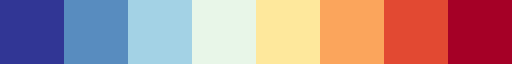

In [3]:
#define centered colorbar
emb = ListedColormap(mpl.colormaps['RdYlBu_r'](np.linspace(0, 1, 8)))
emb

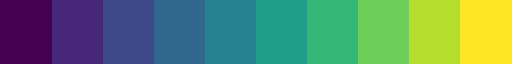

In [4]:
#define progressive colorbar
myvir = ListedColormap(mpl.colormaps['viridis'](np.linspace(0, 1, 10)))
myvir

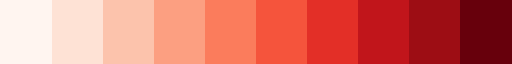

In [5]:
#define progressive colorbar
reds = ListedColormap(mpl.colormaps['Reds'](np.linspace(0, 1, 10)))
reds

# Load files
File to evaluate the behaviour of native routing compared to standard.

First working on the same topographic grid (0.5°).

4 files are considered : one from the standard routing simulation, three from the native routing simulation (sechiba_history, diag_routing, diag_routing_r)

In [6]:
dir='/data/ptiengou/JZ_simu_outputs/routing_native'

In [7]:
#open netcdf files for standard routing
filename = '{}/nat7.1/MO/nat7.1_*_1M_sechiba_history.nc'.format(dir)
std = xr.open_mfdataset(filename)
std

<xarray.Dataset>
Dimensions:                 (lat: 36, lon: 38, solay: 11, veget: 15, nobio: 1,
                             time_counter: 4749, axis_nbounds: 2)
Coordinates:
  * lat                     (lat) float32 27.25 27.75 28.25 ... 44.25 44.75
  * lon                     (lon) float32 -14.75 -14.25 -13.75 ... 3.25 3.75
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * nobio                   (nobio) float32 1.0
    time_centered           (time_counter) datetime64[ns] dask.array<chunksize=(366,), meta=np.ndarray>
  * time_counter            (time_counter) datetime64[ns] 2000-01-01T12:00:00...
Dimensions without coordinates: axis_nbounds
Data variables: (12/70)
    time_centered_bounds    (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    time_counter_bounds     (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    Areas                   (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    Contfrac                (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    evap                    (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    coastalflow             (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    ...                      ...
    humrel                  (time_counter, veget, lat, lon) float32 dask.array<chunksize=(366, 15, 36, 38), meta=np.ndarray>
    mrsos                   (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    mrso                    (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    LAImean                 (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    snowtemp_weighted       (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    frac_snow               (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
Attributes:
    name:         sechiba_history
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Jan-26 16:07:13 GMT
    uuid:         a165ac95-4725-40e6-b8fb-7b8a30bd96f6
    LongName:     Ref config with new driver, WFDEI/v2 halfdeg, and VEGET_UPD...

In [8]:
#open netcdf files for native routing on ORC grid
# filename = 'nat8.1/MO/nat8.1_*_1M_sechiba_history.nc'
filename = '{}/nat14/MO/nat14_*_1M_sechiba_history.nc'.format(dir)
natORC = xr.open_mfdataset(filename)
natORC

<xarray.Dataset>
Dimensions:                 (lat: 36, lon: 38, solay: 11, veget: 15, nobio: 1,
                             time_counter: 4749, axis_nbounds: 2)
Coordinates:
  * lat                     (lat) float32 27.25 27.75 28.25 ... 44.25 44.75
  * lon                     (lon) float32 -14.75 -14.25 -13.75 ... 3.25 3.75
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * nobio                   (nobio) float32 1.0
    time_centered           (time_counter) datetime64[ns] dask.array<chunksize=(366,), meta=np.ndarray>
  * time_counter            (time_counter) datetime64[ns] 2000-01-01T12:00:00...
Dimensions without coordinates: axis_nbounds
Data variables: (12/67)
    time_centered_bounds    (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    time_counter_bounds     (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    Areas                   (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    Contfrac                (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    evap                    (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    coastalflow             (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    ...                      ...
    humrel                  (time_counter, veget, lat, lon) float32 dask.array<chunksize=(366, 15, 36, 38), meta=np.ndarray>
    mrsos                   (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    mrso                    (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    LAImean                 (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    snowtemp_weighted       (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    frac_snow               (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
Attributes:
    name:         sechiba_history
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-01 13:47:52 GMT
    uuid:         9dd2c0bf-21ec-4a96-bd13-e125f9985bca
    LongName:     Ref config with new driver, WFDEI/v2 halfdeg, and VEGET_UPD...

In [9]:
#open netcdf files for native routing diag_routing.nc (on ORC grid)
# filename = 'nat8.1/routing_ORC_grid/nat8.1_*_routing.nc'
filename = '{}/nat14/DA/nat14_*_routing.nc'.format(dir)
natDIAG = xr.open_mfdataset(filename)
natDIAG

<xarray.Dataset>
Dimensions:                        (lat_domain_landpoints: 36,
                                    lon_domain_landpoints: 38,
                                    lat_domain_landpoints_routing: 36,
                                    lon_domain_landpoints_routing: 38,
                                    lat_routing_domain: 40,
                                    lon_routing_domain: 42, time_counter: 4749,
                                    axis_nbounds: 2)
Coordinates:
  * lat_domain_landpoints          (lat_domain_landpoints) float32 27.25 ... ...
  * lon_domain_landpoints          (lon_domain_landpoints) float32 -14.75 ......
  * lat_domain_landpoints_routing  (lat_domain_landpoints_routing) float32 27...
  * lon_domain_landpoints_routing  (lon_domain_landpoints_routing) float32 -1...
  * lat_routing_domain             (lat_routing_domain) float32 45.75 ... 26.25
  * lon_routing_domain             (lon_routing_domain) float32 -15.75 ... 4.75
    time_instant                   (time_counter) datetime64[ns] dask.array<chunksize=(366,), meta=np.ndarray>
  * time_counter                   (time_counter) datetime64[ns] 2000-01-01T1...
    time_centered                  (time_counter) datetime64[ns] dask.array<chunksize=(366,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/14)
    time_instant_bounds            (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    time_counter_bounds            (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    time_centered_bounds           (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    routing_runoff                 (time_counter, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    routing_drainage               (time_counter, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    routing_coastalflow            (time_counter, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    ...                             ...
    routing_fast_reservoir         (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    routing_slow_reservoir         (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    routing_stream_reservoir       (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    routing_irrigation             (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    routing_basins_area            (time_counter, lat_routing_domain, lon_routing_domain) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    routing_stream_diag            (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
Attributes:
    name:         diag_routing
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-01 13:47:53 GMT
    uuid:         ef8caca6-2569-40cc-8eef-2500882e3ead

In [10]:
#open netcdf files for native routing diag_routing_r (regridded to 38x36)
# filename = 'nat8.1/routing_native_grid_regridded/nat8.1_*.nc'
filename = '{}/nat14/DA/nat14_*routing_r.nc'.format(dir)
natDIAG_R = xr.open_mfdataset(filename)
natDIAG_R

<xarray.Dataset>
Dimensions:                     (lat: 40, lon: 42, basins: 200,
                                 time_counter: 4749, axis_nbounds: 2)
Coordinates:
  * lat                         (lat) float32 45.75 45.25 44.75 ... 26.75 26.25
  * lon                         (lon) float32 -15.75 -15.25 -14.75 ... 4.25 4.75
  * basins                      (basins) |S255 b'Amazon\x00                  ...
    time_instant                (time_counter) datetime64[ns] dask.array<chunksize=(366,), meta=np.ndarray>
  * time_counter                (time_counter) datetime64[ns] 2000-01-01T12:0...
    time_centered               (time_counter) datetime64[ns] dask.array<chunksize=(366,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/18)
    time_instant_bounds         (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    flow_r                      (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    routing_runoff_r            (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    routing_lakeinflow_r        (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    ...                          ...
    routing_hydrographs_r       (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    irrig_netereq_r             (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    routing_irrigation_r        (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    basins_riverflow            (time_counter, basins) float64 dask.array<chunksize=(366, 200), meta=np.ndarray>
    routing_basins_area         (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    routing_stream_diag_r       (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
Attributes:
    name:         diag_routing_r
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-01 13:47:53 GMT
    uuid:         d24203e9-83c1-4595-a282-a23274992ada

# File manipulations

In [11]:
#rename time_counter to time all files
std = std.rename({'time_counter' : 'time'})
natORC = natORC.rename({'time_counter' : 'time'})
natDIAG = natDIAG.rename({'time_counter' : 'time'})
natDIAG_R = natDIAG_R.rename({'time_counter' : 'time'})

In [12]:
# Remove first years to consider a spinup
spinupyears=[2000,2001,2002]
# spinupyears=[]
for year in spinupyears:
    std = std.where(std['time.year'] != year, drop=True)
    natORC = natORC.where(natORC['time.year'] != year, drop=True)
    natDIAG = natDIAG.where(natDIAG['time.year'] != year, drop=True)
    natDIAG_R = natDIAG_R.where(natDIAG_R['time.year'] != year, drop=True)

In [13]:
#Rename lat_domain_landpoints to lat and lon_domain_landpoints to lon in natDIAG
# natDIAG = natDIAG.rename({'lat_domain_landpoints':'lat','lon_domain_landpoints':'lon'})

#OR do it for lat_domain_landpoints_routing and lon_domain_landpoints_routing (for reservoirs)

natDIAG = natDIAG.rename({'lat_domain_landpoints_routing':'lat','lon_domain_landpoints_routing':'lon'})
natDIAG

<xarray.Dataset>
Dimensions:                   (time: 3653, axis_nbounds: 2,
                               lat_domain_landpoints: 36,
                               lon_domain_landpoints: 38, lat: 36, lon: 38,
                               lat_routing_domain: 40, lon_routing_domain: 42)
Coordinates:
  * lat_domain_landpoints     (lat_domain_landpoints) float32 27.25 ... 44.75
  * lon_domain_landpoints     (lon_domain_landpoints) float32 -14.75 ... 3.75
  * lat                       (lat) float32 27.25 27.75 28.25 ... 44.25 44.75
  * lon                       (lon) float32 -14.75 -14.25 -13.75 ... 3.25 3.75
  * lat_routing_domain        (lat_routing_domain) float32 45.75 45.25 ... 26.25
  * lon_routing_domain        (lon_routing_domain) float32 -15.75 ... 4.75
    time_instant              (time) datetime64[ns] dask.array<chunksize=(365,), meta=np.ndarray>
  * time                      (time) datetime64[ns] 2003-01-01T12:00:00 ... 2...
    time_centered             (time) datetime64[ns] dask.array<chunksize=(365,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/14)
    time_instant_bounds       (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    time_counter_bounds       (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    time_centered_bounds      (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    routing_runoff            (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_drainage          (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_coastalflow       (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    ...                        ...
    routing_fast_reservoir    (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_slow_reservoir    (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_stream_reservoir  (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_irrigation        (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_basins_area       (time, lat_routing_domain, lon_routing_domain) float64 dask.array<chunksize=(365, 40, 42), meta=np.ndarray>
    routing_stream_diag       (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
Attributes:
    name:         diag_routing
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-01 13:47:53 GMT
    uuid:         ef8caca6-2569-40cc-8eef-2500882e3ead

In [14]:
#remove first and last longitude and latitude for natDIAG_R
natDIAG_R = natDIAG_R.isel(lon=slice(2,-2),lat=slice(2,-2))

In [15]:
#extract monthly mean from natDIAG_R
natDIAG_month= natDIAG.resample(time='MS').mean()
#shift all values by 14 days to be in the middle of the month
natDIAG_month['time'] = natDIAG_month['time'] + np.timedelta64(14, 'D')
natDIAG_month

<xarray.Dataset>
Dimensions:                   (time: 120, lat_domain_landpoints: 36,
                               lon_domain_landpoints: 38, lat: 36, lon: 38,
                               lat_routing_domain: 40, lon_routing_domain: 42)
Coordinates:
  * lat_domain_landpoints     (lat_domain_landpoints) float32 27.25 ... 44.75
  * lon_domain_landpoints     (lon_domain_landpoints) float32 -14.75 ... 3.75
  * lat                       (lat) float32 27.25 27.75 28.25 ... 44.25 44.75
  * lon                       (lon) float32 -14.75 -14.25 -13.75 ... 3.25 3.75
  * lat_routing_domain        (lat_routing_domain) float32 45.75 45.25 ... 26.25
  * lon_routing_domain        (lon_routing_domain) float32 -15.75 ... 4.75
  * time                      (time) datetime64[ns] 2003-01-15 ... 2012-12-15
Data variables:
    routing_runoff            (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_drainage          (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_coastalflow       (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_riverflow         (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_lakeinflow        (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_fast_reservoir    (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_slow_reservoir    (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_stream_reservoir  (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_irrigation        (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_basins_area       (time, lat_routing_domain, lon_routing_domain) float64 dask.array<chunksize=(1, 40, 42), meta=np.ndarray>
    routing_stream_diag       (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
Attributes:
    name:         diag_routing
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-01 13:47:53 GMT
    uuid:         ef8caca6-2569-40cc-8eef-2500882e3ead

In [16]:
#extract monthly mean from natDIAG_R
natDIAG_R_month= natDIAG_R.resample(time='MS').mean()
#shift all values by 14 days to be in the middle of the month
natDIAG_R_month['time'] = natDIAG_R_month['time'] + np.timedelta64(14, 'D')
natDIAG_R_month

<xarray.Dataset>
Dimensions:                     (time: 120, lat: 36, lon: 38, basins: 200)
Coordinates:
  * lat                         (lat) float32 44.75 44.25 43.75 ... 27.75 27.25
  * lon                         (lon) float32 -14.75 -14.25 -13.75 ... 3.25 3.75
  * basins                      (basins) |S255 b'Amazon\x00                  ...
  * time                        (time) datetime64[ns] 2003-01-15 ... 2012-12-15
Data variables: (12/15)
    flow_r                      (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_runoff_r            (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_lakeinflow_r        (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_coastalflow_r       (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_riverflow_r         (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_drainage_r          (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    ...                          ...
    routing_hydrographs_r       (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    irrig_netereq_r             (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_irrigation_r        (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    basins_riverflow            (time, basins) float64 dask.array<chunksize=(1, 200), meta=np.ndarray>
    routing_basins_area         (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_stream_diag_r       (time, lat, lon) float64 dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
Attributes:
    name:         diag_routing_r
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-01 13:47:53 GMT
    uuid:         d24203e9-83c1-4595-a282-a23274992ada

In [70]:
#Change dataset names attribute for automatic labeling
std.attrs['name'] = 'Standard routing (subgrid_halfdeg)'
natORC.attrs['name'] = 'Routing interp_topo_halfdeg'
natDIAG_R.attrs['name'] = 'Routing interp_topo_halfdeg'
natDIAG_month.attrs['name'] = 'diag_routing_monthly'
natDIAG_R_month.attrs['name'] = 'diag_routing_monthly_r'

In [18]:
#Rename variables in natDIAG_R_month and natDIAG_R
dict = {'routing_stream_reservoir_r' : 'streamr',
        'routing_fast_reservoir_r' : 'fastr',
        'routing_slow_reservoir_r' : 'slowr',
        'routing_drainage_r' : 'drainage',
        'routing_runoff_r' : 'runoff',
        'routing_hydrographs_r' : 'hydrographs',
        'routing_riverflow_r' : 'riverflow',
        'routing_coastalflow_r' : 'coastalflow'}
#change the variables that exist according to the dictionary
natDIAG_R = natDIAG_R.rename(dict)
natDIAG_R_month = natDIAG_R_month.rename(dict)

In [19]:
#Rename variables in natDIAG_month
dict = {'routing_stream_reservoir' : 'streamr',
        'routing_fast_reservoir' : 'fastr',
        'routing_slow_reservoir' : 'slowr',
        'routing_drainage' : 'drainage',
        'routing_runoff' : 'runoff',
        'routing_riverflow' : 'riverflow',
        'routing_coastalflow' : 'coastalflow'}
#change the variables that exist according to the dictionary
natDIAG_month = natDIAG_month.rename(dict)
natDIAG = natDIAG.rename(dict)

# Stations

In [20]:
filename='../../../routing/GRDC_Monthly_Jan20_v1_ES.nc'
stations = xr.open_dataset(filename)
stations

<xarray.Dataset>
Dimensions:            (time: 2580, stations: 1297, maxalt: 2, z: 7740)
Coordinates:
  * time               (time) datetime64[ns] 1807-01-15 ... 2021-12-15
Dimensions without coordinates: stations, maxalt, z
Data variables: (12/18)
    number             (stations) int32 ...
    next               (stations) int32 ...
    WMOreg             (stations) int32 ...
    WMOsubreg          (stations) int32 ...
    name               (stations) |S60 ...
    river              (stations) |S60 ...
    ...                 ...
    altitude           (stations) float32 ...
    hydrographs        (time, stations) float32 ...
    alternative_index  (maxalt, stations) int32 ...
    alt_hydrograph     (time, z) float32 ...
    flags              (time, stations) float32 ...
    mergedhydro        (time, stations) float32 ...
Attributes:
    history:         Merge of GRDC_Monthly_Jan20.nc and Spain_Monthly_May20.nc
    metadata:        Missing metadata are replaced by XXX or -999
    Source:          GRDC_Monthly_Jan20.nc+Spain_Monthly_May20.nc
    MergeSource1:    Computed at GRDC from daily values
    MergeSource2:    Spanish data obtained from Observatorio del Ebro in May ...
    MergeSource3:    Original monthly Hydrographs
    ConversionDate:  2020-05-08

In [21]:
stations_merit = {
    6298249: {'name': 'Zaragoza',  'river': 'Ebro', 'lon_grid':-0.8749926686286926, 'lat_grid':41.65833282470703, 'year_min':2003, 'year_max':2012},
    6298992: {'name': 'Albarreal De Tajo',  'river': 'Tajo', 'lon_grid':-4.17499303817749, 'lat_grid':39.891666412353516, 'year_min':2003, 'year_max':2012 },
    6298481: {'name': 'San Miguel del Pino', 'river': 'Duero', 'lon_grid':-4.92499303817749, 'lat_grid':41.508331298828125, 'year_min':2003, 'year_max':2012},
    6298259:{'name': 'Badajoz', 'river': 'Guadiana', 'lat_grid': 38.85833358764648, 'lon_grid': -7.008326530456543, 'last_record': '2013-09-15', 'year_min':2003, 'year_max':2012}
                }

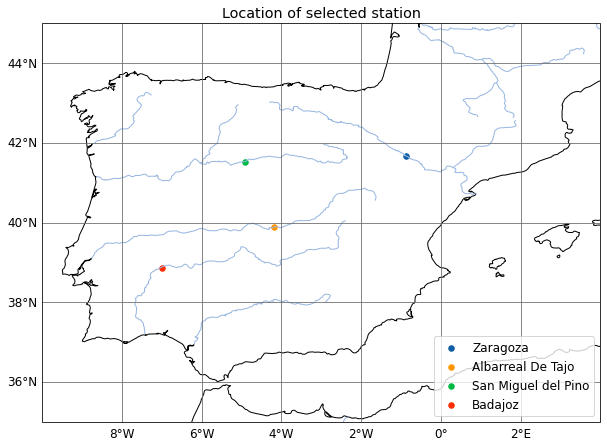

In [22]:
# plot station location on a map with rivers and coastlines
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-10, 4, 35, 45])
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.ylocator = gl.ylocator = plt.MaxNLocator(5)
gl.right_labels = False
gl.top_labels = False
for key, coordinates in stations_merit.items():
    plt.scatter(coordinates['lon_grid'], coordinates['lat_grid'], s=30, label=coordinates['name'], marker='o')
plt.title('Location of selected station')
#activate legend and put it in the bottom right corner
plt.legend(loc='lower right')

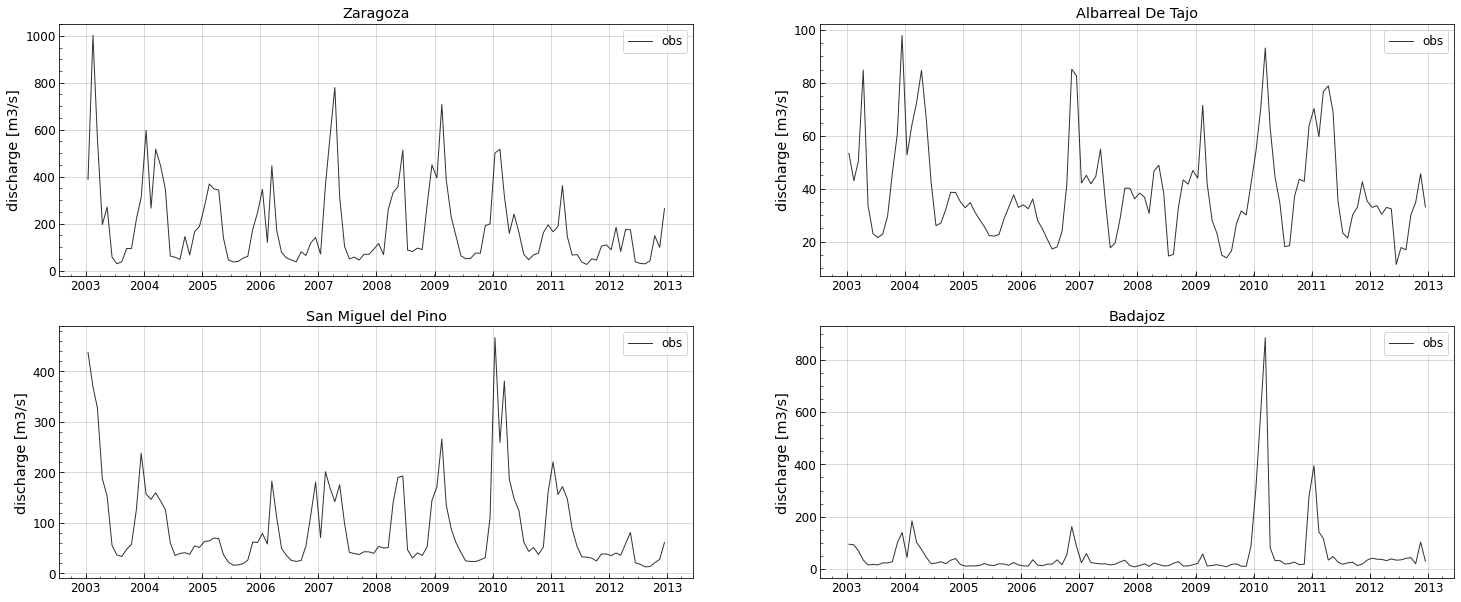

In [23]:
# visualize time series for selected stations
fig, ax = plt.subplots(2, 2, figsize=(25, 10))
ax = ax.flatten()
for i, (key, coordinates) in enumerate(stations_merit.items()):
    mask = (stations['number'] == key)
    station = stations.sel(stations=mask)
    #remove years before 2003 and after 2012
    station = station.where((station['time.year'] >= coordinates['year_min']), drop=True)
    station = station.where((station['time.year'] <= coordinates['year_max']), drop=True)
    ax[i].plot(station['time'],station['mergedhydro'], label='obs', c='black')
    ax[i].set_title(coordinates['name'])
    ax[i].set_ylabel('discharge [m3/s]')
    ax[i].legend()

# Maps

Text(0.5, 1.0, 'fastr (diag_routing)')

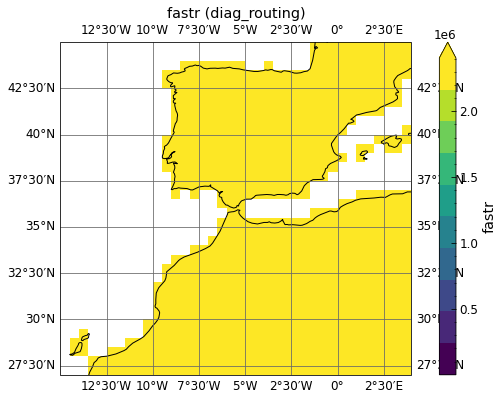

In [100]:
#Display map of var for ds
var='fastr'
ds = natDIAG_R_month
valmax=1
plotvar = ds[var].mean(dim='time')
plotvar=plotvar.where(plotvar>1e-5)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
#use colormap with 20 bins from min to max value
plotvar.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=myvir, vmax=valmax)
plt.title(var + ' (' + ds.name + ')')

Text(0.5, 1.0, 'Routing interp_topo_halfdeg')

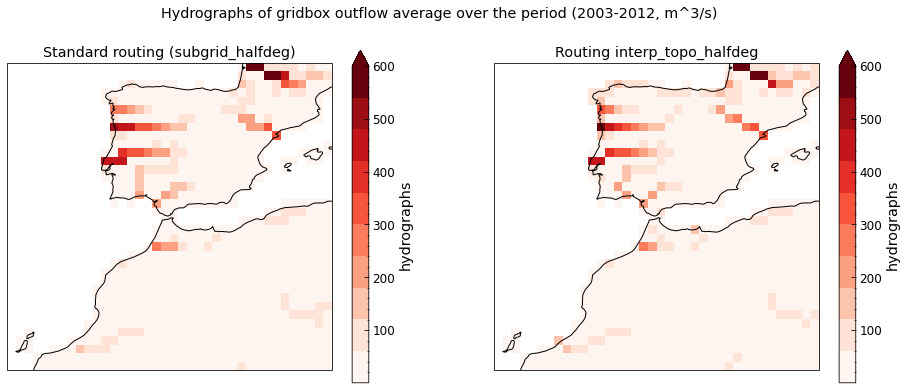

In [96]:
# Display map of var
var = 'hydrographs'
max_val=600

ds_std = std
plotvar_std = ds_std[var].mean(dim='time')
plotvar_std=plotvar_std.where(plotvar_std>0)

ds_nat = natDIAG_R
plotvar_nat = ds_nat[var].mean(dim='time')
plotvar_nat=plotvar_nat.where(plotvar_nat>0)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': ccrs.PlateCarree()})
# fig.suptitle(var + ' average over the period (2003-2012)')
fig.suptitle(ds_std[var].long_name + ' average over the period (2003-2012, {})'.format(ds_std[var].units))

# Plot for std dataset
axs[0].coastlines()
plotvar_std.plot(ax=axs[0], transform=ccrs.PlateCarree(), cmap=reds, vmax=max_val)
axs[0].set_title(f'{ds_std.name}')

# Plot for natORC dataset
axs[1].coastlines()
plotvar_nat.plot(ax=axs[1], transform=ccrs.PlateCarree(), cmap=reds, vmax=max_val)
axs[1].set_title(f'{ds_nat.name}')

fastr RMSE (Standard routing (subgrid_halfdeg)-Routing interp_topo_halfdeg, spatial and temporal mean) : 0.10293253


Text(0.5, 1.0, 'Fast flow reservoir average RMSD')

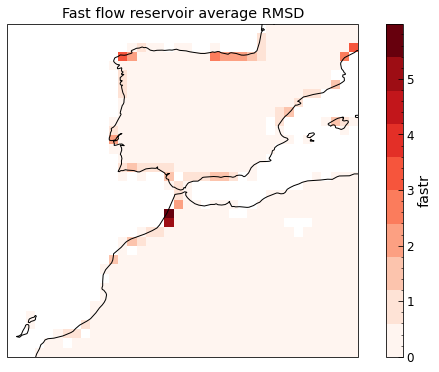

In [80]:
#RMSE map
var='fastr'
ds1=std
ds2=natORC
#compute RMSE between ds1 and ds2
rmse = np.sqrt(((ds1[var]-ds2[var])**2).mean(dim='time'))
rel_rmse = rmse/ds2[var].mean(dim='time')

#output the value of the rmse after spatial averaging over all grid points
print(var + ' RMSE (' + ds1.name + '-' + ds2.name+ ', spatial and temporal mean) : ' + str(rmse.mean(dim=['lon','lat']).values))

#display map of rmse
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
rmse.where(rmse>0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap=reds)
# plt.title(ds1[var].long_name + ' average RMSE  (' + ds1.name + ' - ' + ds2.name + ')')
plt.title(ds1[var].long_name + ' average RMSD')

Text(0.5, 1.0, 'Hydrographs of gridbox outflow difference')

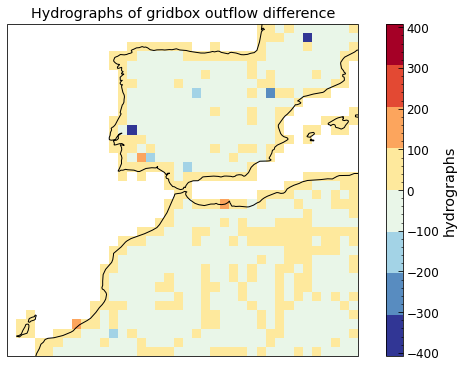

In [86]:
#Diff map
var='hydrographs'
ds1=natDIAG_R
ds2=std
maxval=None
minval=None
#compute diff between ds1 and ds2
diff = (ds1[var]-ds2[var]).mean(dim='time')
# rel_diff = ((ds1[var]-ds2[var]) / (ds2[var] + 1E-16)).mean(dim='time')
# Transform rel_diff using log10
# rel_diff_log = np.log10(rel_diff)
#display map
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
# rel_diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=emb)
diff.where(diff!=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap=emb, vmin=minval, vmax=maxval)
plt.title(ds2[var].long_name + ' difference')# (' + ds1.name + ' - ' + ds2.name + ')')

In [29]:
#RMSE and rRMSE values for multiple variables
varlist=['streamr', 'fastr', 'slowr']
# varlist=['drainage', 'runoff']
ds1=natORC
ds2=std
#compute RMSE between ds1 and ds2
for var in varlist:
    rmse = np.sqrt(((ds1[var]-ds2[var])**2).mean(dim='time'))
    # rel_rmse = rmse/ds2[var].mean(dim='time')
    #output the value of the rmse after spatial averaging over all grid points
    print(var + ' RMSE (' + ds1.name + '-' + ds2.name+ ', spatial and temporal mean) : ' + str((rmse.mean(dim=['lon','lat']).values)))
    # print(var + ' rRMSE (' + ds1.name + '-' + ds2.name+ ', spatial and temporal mean) : ' + str((rel_rmse.mean(dim=['lon','lat']).values)))

streamr RMSE (Routing interpolated_halfdeg (ORC)-Standard routing (subgrid_halfdeg), spatial and temporal mean) : 0.7119533
fastr RMSE (Routing interpolated_halfdeg (ORC)-Standard routing (subgrid_halfdeg), spatial and temporal mean) : 0.10293253
slowr RMSE (Routing interpolated_halfdeg (ORC)-Standard routing (subgrid_halfdeg), spatial and temporal mean) : 2.0377738


# Time series

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


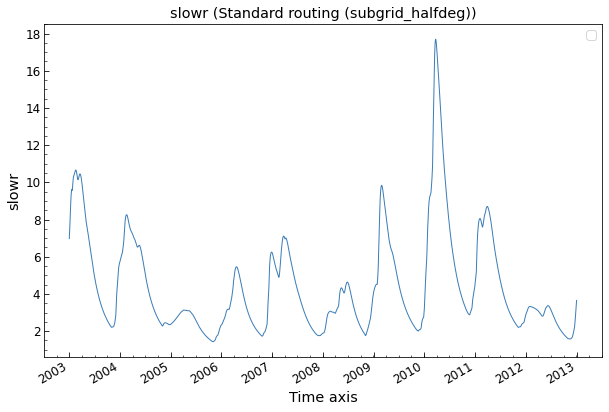

In [30]:
#Average time series
var='slowr'
year_min=2000
year_max=2012
ds1=std
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
#plot the time series of hydrographs at the point (lon,lat)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ds1[var].mean(dim=['lon','lat']).plot(ax=ax)
plt.title(var + ' (' + ds1.name + ')')
plt.legend()

# Hydrographs en un point

In [31]:
river_coordinates = {
    'Ebre': {'lon': 0.75, 'lat': 40.75},
    'Tage': {'lon': -9.25, 'lat': 39.25},
    'Douro': {'lon': -8.75, 'lat': 41.25},
    'Guadiana': {'lon': -7.25, 'lat': 38.25},
    'Guadalquivir': {'lon': -6.25, 'lat': 36.75},
    'Minho': {'lon': -8.75, 'lat': 42.25}
}

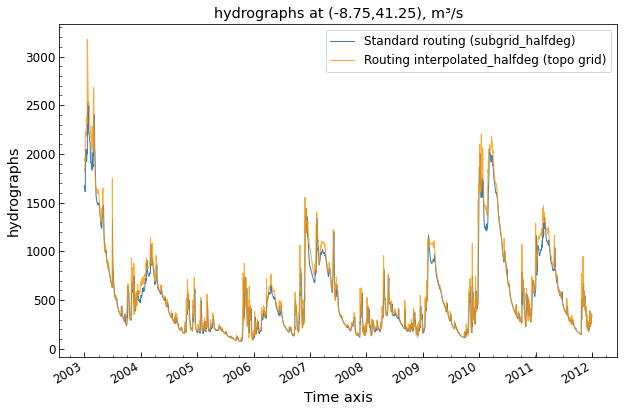

In [32]:
#Time series
year_min=2003
year_max=2011
# Douro
lon=-8.75
lat=41.25

var="hydrographs"
ds1=std
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
ds2=natDIAG_R
ds2 = ds2.where(ds2['time.year'] >= year_min, drop=True).where(ds2['time.year'] <= year_max, drop=True)
#plot the time series of hydrographs at the point (lon,lat)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ax.set_ylabel('hydrographs')
ds1[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds1.name)
ds2[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds2.name)
# ds2['runoff'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='runoff')
plt.title('hydrographs at (' + str(lon) + ',' + str(lat) + '), m³/s')
plt.legend()

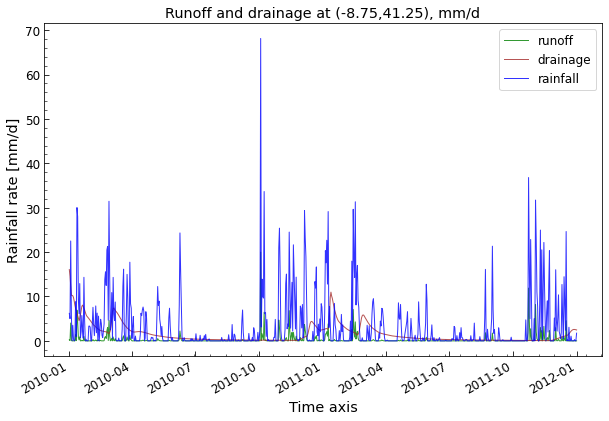

In [33]:
#Time series
year_min=2010
year_max=2011
ds1=std
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
#plot the time series of hydrographs at the point (lon,lat)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ds1['runoff'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='runoff',c='green')
ds1['drainage'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='drainage',c='brown')
ds1['rain'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='rainfall',c='blue')
plt.title('Runoff and drainage at (' + str(lon) + ',' + str(lat) + '), mm/d')
plt.legend()

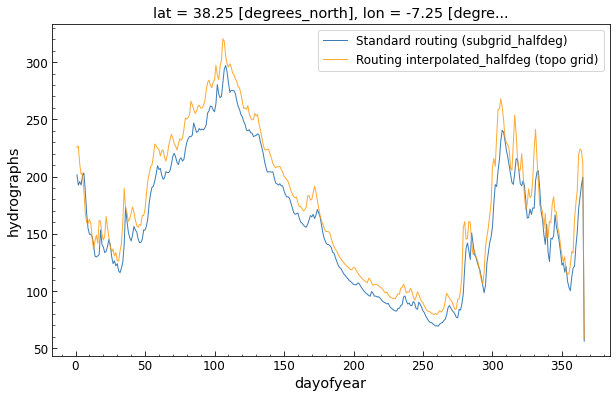

In [34]:
#Cycle saisonnier (moyenne par jour de l'année)
var="hydrographs"
#Ebre
# lon=0.75
# lat=40.75
# # Tage
# lon=-9.25
# lat=39.25
# # Douro
# lon=-8.75
# lat=41.25
# # Guadiana
lon=-7.25
lat=38.25
# # Guadalquivir
# lon=-6.25
# lat=36.75
ds1=std
ds2=natDIAG_R
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ax.set_xlabel('month')
ax.set_ylabel('hydrographs')
ax.set_title('hydrographs at (' + str(lon) + ',' + str(lat) + ')')
#compute the annual cycle of hydrographs at the point (lon,lat)
ds1[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.dayofyear').mean(dim='time').plot(ax=ax, label=ds1.name)
ds2[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.dayofyear').mean(dim='time').plot(ax=ax, label=ds2.name)
plt.legend()

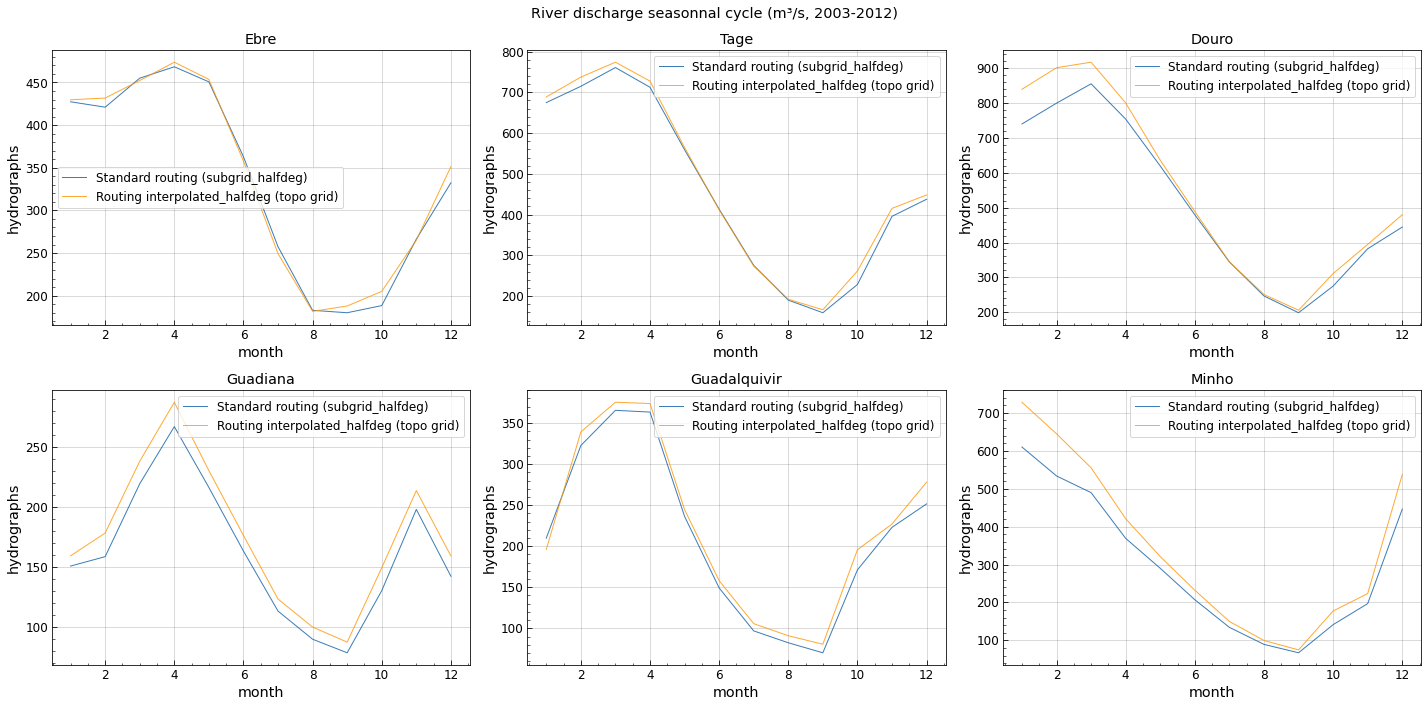

In [35]:
#cycle saisonnier pour 6 points de grille
var = "hydrographs"
ds1 = std
ds2 = natDIAG_R

# Create subplots for each river in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over rivers and plot hydrographs
for i, (river, coordinates) in enumerate(river_coordinates.items()):
    lon = coordinates['lon']
    lat = coordinates['lat']
    
    ax = axes[i]

    # Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
    ds1[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds1.name)
    ds2[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds2.name)
    
    ax.legend()
    #set subplot title to river name
    ax.set_title(river)

# Remove any remaining empty subplots
for i in range(len(river_coordinates), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("River discharge seasonnal cycle (m³/s, 2003-2012)")
plt.tight_layout()

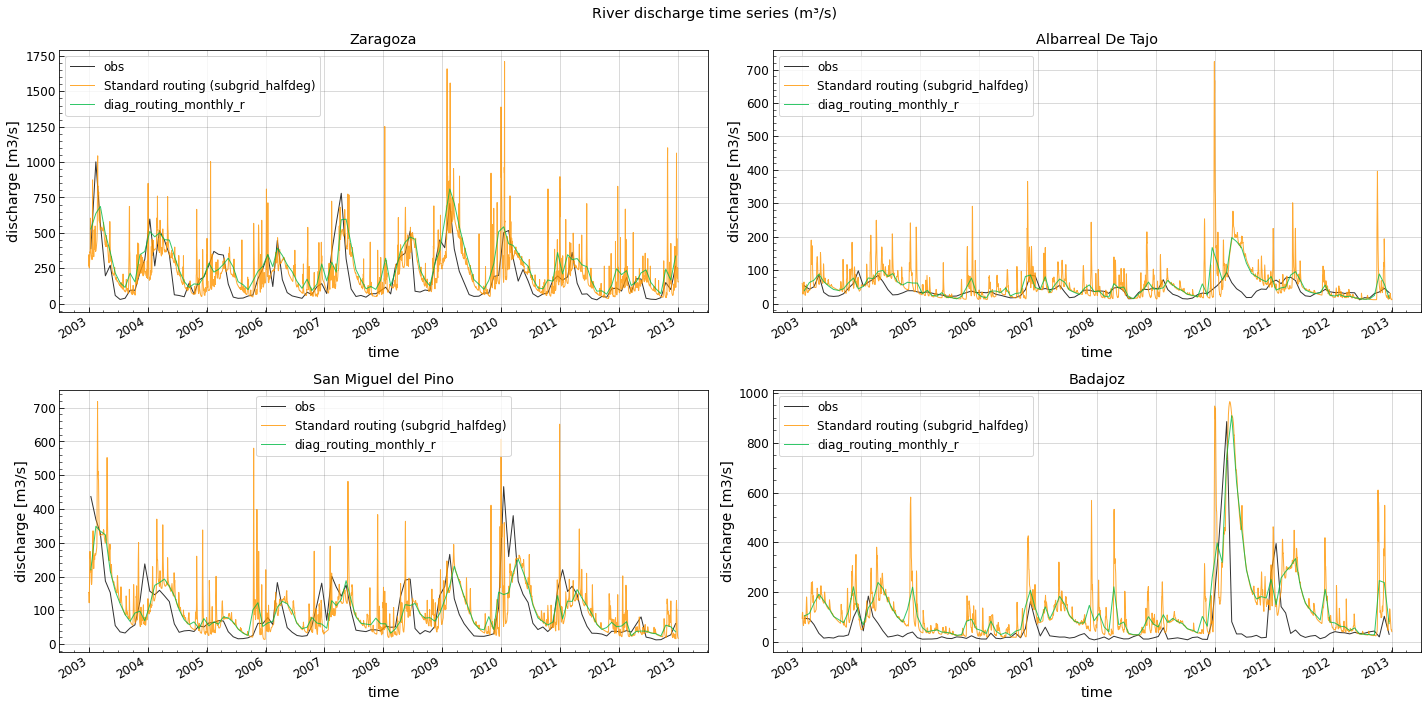

In [36]:
#cycle saisonnier pour 6 stations
var = "hydrographs"
ds1 = std
ds2 = natDIAG_R_month

# Create subplots for each river in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over rivers and plot hydrographs
# for i, (station, coordinates) in enumerate(stations_merit.items()):
#     lon = coordinates['lon']
#     lat = coordinates['lat']
    
#     ax = axes[i]

#     # Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
#     ds1[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds1.name)
#     ds2[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds2.name)
    
#     ax.legend()
#     #set subplot title to river name
#     ax.set_title(river)

for i, (key, coordinates) in enumerate(stations_merit.items()):
    ax=axes[i]
    mask = (stations['number'] == key)
    station = stations.sel(stations=mask)
    #remove years before 2003 and after 2012
    station = station.where((station['time.year'] >= coordinates['year_min']), drop=True)
    station = station.where((station['time.year'] <= coordinates['year_max']), drop=True)
    ax.plot(station['time'],station['mergedhydro'], label='obs', c='black')

    lon = coordinates['lon_grid']
    lat = coordinates['lat_grid']
    ds1[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds1.name)
    ds2[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds2.name)

    ax.set_title(coordinates['name'])
    ax.set_ylabel('discharge [m3/s]')
    ax.legend()

# Remove any remaining empty subplots
for i in range(len(river_coordinates), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("River discharge time series (m³/s)")
plt.tight_layout()

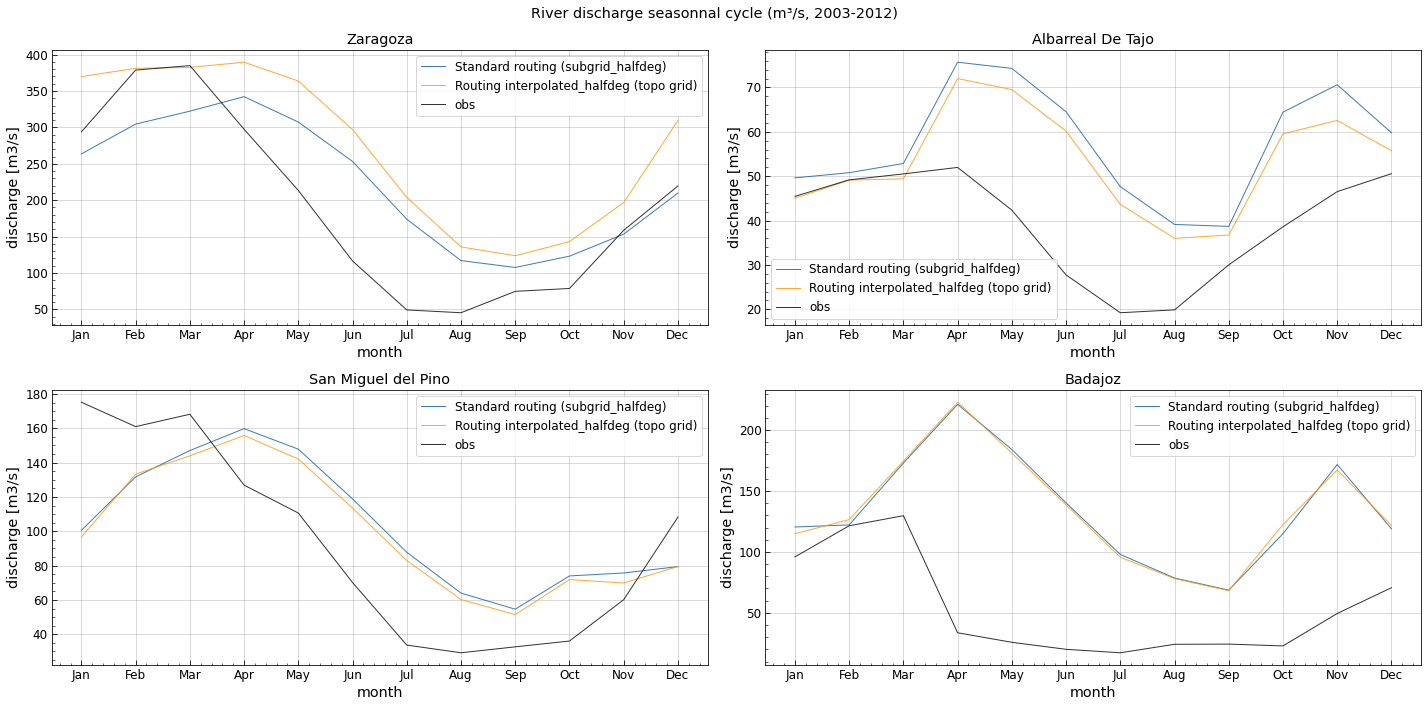

In [37]:
#cycle saisonnier pour 6 stations
var = "hydrographs"
ds1 = std
ds2 = natDIAG_R

# Create subplots for each river in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over rivers and plot hydrographs
# for i, (station, coordinates) in enumerate(stations_merit.items()):
#     lon = coordinates['lon']
#     lat = coordinates['lat']
    
#     ax = axes[i]

#     # Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
#     ds1[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds1.name)
#     ds2[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds2.name)
    
#     ax.legend()
#     #set subplot title to river name
#     ax.set_title(river)

for i, (key, coordinates) in enumerate(stations_merit.items()):
    ax=axes[i]

    lon = coordinates['lon_grid']
    lat = coordinates['lat_grid']
    ds1[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds1.name)
    ds2[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds2.name)


    mask = (stations['number'] == key)
    station = stations.sel(stations=mask)
    #remove years before 2003 and after 2012
    station = station.where((station['time.year'] >= coordinates['year_min']), drop=True)
    station = station.where((station['time.year'] <= coordinates['year_max']), drop=True)
    station = station.groupby('time.month').mean()
    ax.plot(station['month'],station['mergedhydro'], label='obs', c='black')

    ax.set_title(coordinates['name'])
    ax.set_ylabel('discharge [m3/s]')
    #add months name to x-axis ticks
    months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ax.set_xticks(np.arange(1,13))
    ax.set_xticklabels(months)
    ax.legend()

# Remove any remaining empty subplots
for i in range(len(river_coordinates), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("River discharge seasonnal cycle (m³/s, 2003-2012)")
plt.tight_layout()

# Vertical profiles